In [1]:
# Librerías

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Lectura de TODA la base datos
dfs = pd.read_excel("data/accidentes_Bogota.xlsx", sheet_name=None)

### Descripción de la base de datos:

En el archivo de excel hay 5 hojas: 

- **SINIESTROS:** Información de los Sinietros viales entre 2015 y 2020
- **ACTOR_VIAL:** 
- **VEHICULOS:** 
- **HIPOTESIS:** 
- **DICCIONARIO:** 

In [3]:
dfs["DICCIONARIO"][dfs["DICCIONARIO"]["HOJA"] == "VEHICULOS"]

,HOJA,CAMPO,CODIGO,DESCRIPCION
58,VEHICULOS,CLASE,1,Automovil
59,VEHICULOS,CLASE,2,Bus
60,VEHICULOS,CLASE,3,Buseta
61,VEHICULOS,CLASE,4,"Camion, Furgon"
62,VEHICULOS,CLASE,5,Camioneta
63,VEHICULOS,CLASE,6,Campero
64,VEHICULOS,CLASE,7,Microbus
65,VEHICULOS,CLASE,8,Tractocamion
66,VEHICULOS,CLASE,9,Volqueta
67,VEHICULOS,CLASE,10,Motocicleta


#### Base de datos de siniestros:

Descripción y análisis de de los siniestros

Columnas relevantes:
- CODIGO_ACCIDENTE: 
- FECHA
- HORA
- GRAVEDAD: Severidad del accidente.



In [17]:
# Unificar la base de datos de actores y siniestros

df = pd.merge(dfs["ACTOR_VIAL"], dfs["SINIESTROS"], on="CODIGO_ACCIDENTE", how="left", suffixes=('', '_y'))
df.drop(columns=["FECHA_y"], inplace=True)

# Añadir también los vehículos 

df = pd.merge(df, dfs["VEHICULOS"], on="VEHICULO", how="left", suffixes=('', '_y'))
df.drop(columns=["CODIGO_ACCIDENTE_y","FECHA_y",], inplace=True)
df.rename(columns={"CLASE_y" : "MODO"}, inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 422416 entries, 0 to 422415
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CODIGO_ACCIDENTE    422416 non-null  int64  
 1   CODIGO_ACCIDENTADO  422416 non-null  int64  
 2   FECHA               422416 non-null  object 
 3   CONDICION           422416 non-null  object 
 4   ESTADO              422416 non-null  object 
 5   EDAD                422416 non-null  object 
 6   SEXO                422416 non-null  object 
 7   VEHICULO            398969 non-null  object 
 8   HORA                422416 non-null  object 
 9   GRAVEDAD            422416 non-null  int64  
 10  CLASE               422416 non-null  int64  
 11  CHOQUE              363809 non-null  float64
 12  OBJETO_FIJO         10551 non-null   float64
 13  DIRECCION           422416 non-null  object 
 14  CODIGO_LOCALIDAD    422416 non-null  int64  
 15  DISENO_LUGAR        422416 non-nul

#### Depuración y transformación de los datos:

En general se realizan los siguientes cambios:

-   Transformar fechas datetime
- Añadir las columnas de mes y día de la semana

In [19]:
# to datetime
df["FECHA_DT"] = pd.to_datetime(df["HORA"]+" "+df["FECHA"])

# Añadir mes
df["MES"] = df["FECHA_DT"].dt.month_name(locale="Spanish")

# Día de la semana
df["FECHA_DT"].dt.day_name(locale="Spanish")

#### Visualización de la temporalidad de los accidentes

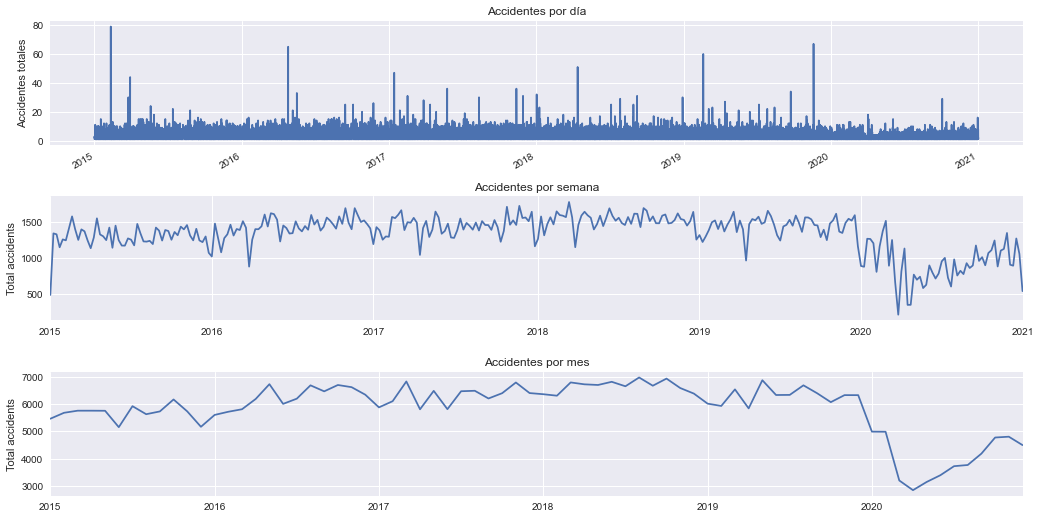

In [25]:
def accidentes_mes():
    monthly_accidents = df["FECHA_DT"].value_counts().to_period("M")
    monthly_accidents = monthly_accidents.groupby(monthly_accidents.index).sum()
    return monthly_accidents


plt.style.use('seaborn') #Seaborn style
plt.rcParams['figure.figsize'] = [15, 9]

fig, axes = plt.subplots(nrows= 3, ncols=1) # creating a figure and axes
fig.tight_layout(pad=4.0) # Specific spacing between subplots

# Create axes using pd.plt()
#its easier to format and style the plot this way, since the data is already in pandas envi.

#creating the axes 0 (Accidents per day plot):
df["FECHA_DT"].value_counts().sort_index(ascending=True).plot(
    title = 'Accidentes por día',
    ylabel='Accidentes totales',
    ax=axes[0]
)
#creating the axes 1 (Accidents per week plot):
df["FECHA_DT"].value_counts().to_period("W").groupby(level=0).sum().plot(
    title = 'Accidentes por semana',
    ylabel='Total accidents',
    ax=axes[1]
)
#creating the axes 2 (Accidents per month plot):
accidentes_mes().to_timestamp().plot(
    title = 'Accidentes por mes',
    ylabel='Total accidents',
    ax=axes[2]);

#### Variables relevantes vs severidad

##### Edad:

<AxesSubplot:xlabel='ESTADO', ylabel='EDAD'>

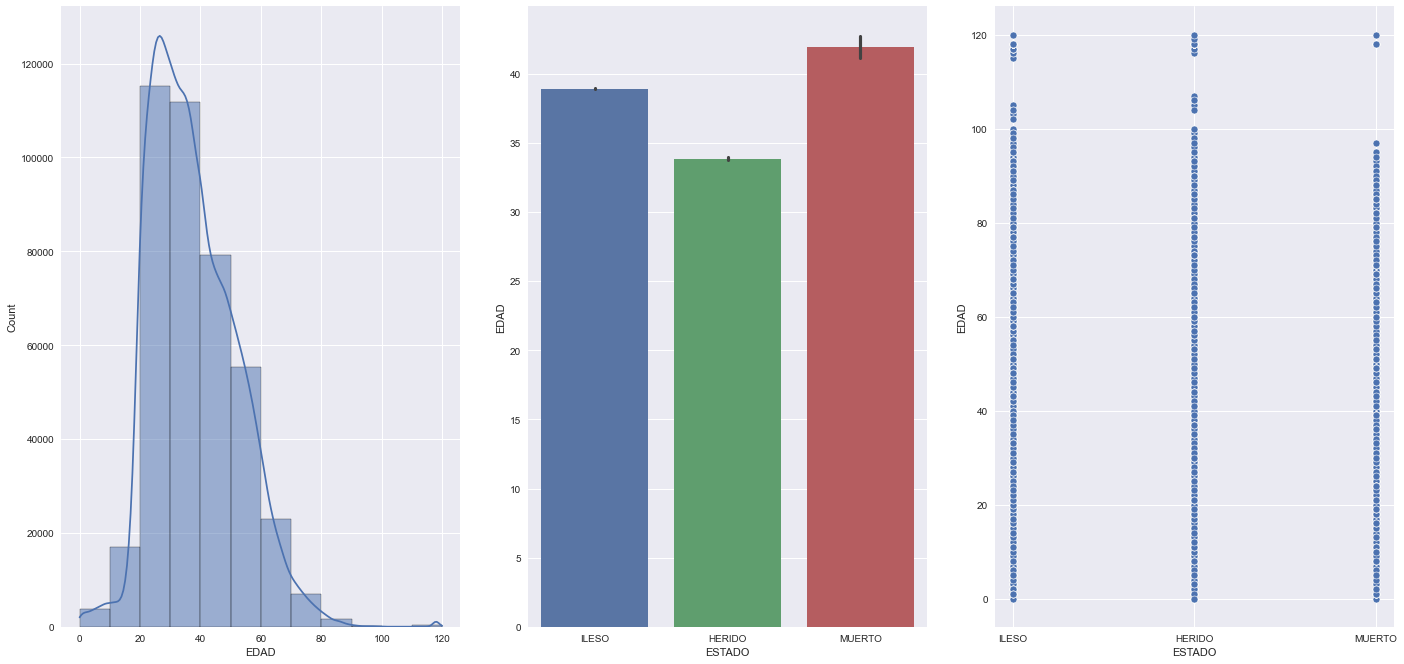

In [104]:
# Estado vs EDAD
plot_df = df[df["EDAD"] != "SIN INFORMACION"]
plt.rcParams['figure.figsize'] = [20, 10]

fig, axes = plt.subplots(nrows= 1, ncols=3) # creating a figure and axes


fig.tight_layout(pad=4.0) # Specific spacing between subplots


sns.histplot(data= plot_df, x="EDAD", bins=12, kde=True, ax=axes[0])
sns.barplot(data= plot_df, y="EDAD", x="ESTADO", ax=axes[1])
sns.scatterplot(data= plot_df, y="EDAD", x="ESTADO", ax=axes[2])

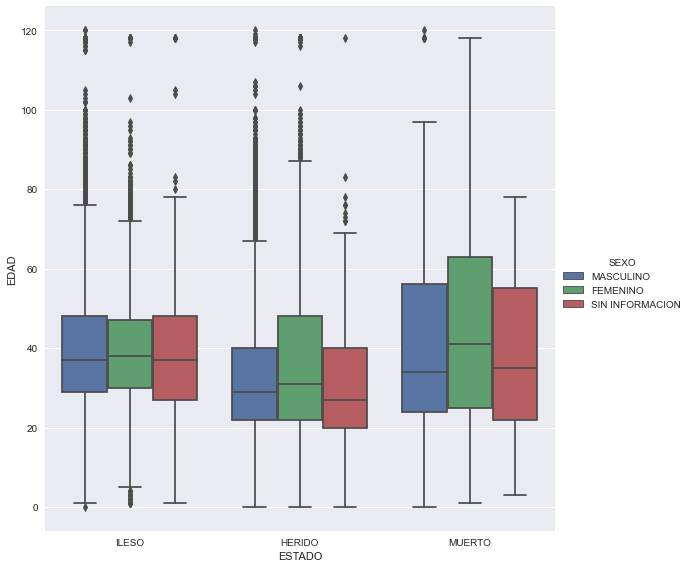

In [100]:
# ESTADO VS EDAD POR SEXO
sns.catplot(data= plot_df, y="EDAD", x="ESTADO", hue="SEXO", kind="box",height=8);

##### Sexo:

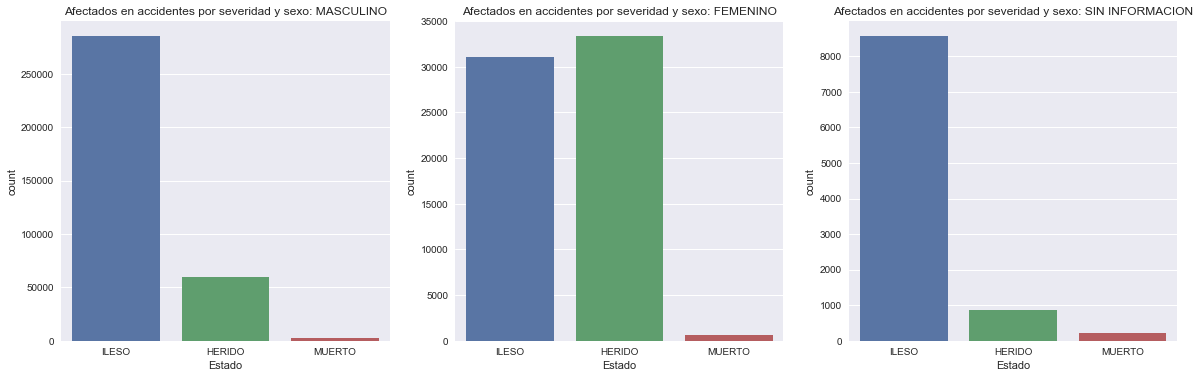

In [73]:
# ESTADO VS SEXO
plt.figure(figsize=(20, 20))

# loop through the scatters list
for i, sexo in enumerate(df["SEXO"].unique()):
    # create a ax iteratively
    ax = plt.subplot(3, 3, i + 1)

    # create a subplot
    sns.countplot(data= df[df["SEXO"] == sexo], x="ESTADO", order=["ILESO", "HERIDO", "MUERTO"], ax=ax)

    # formatting
    ax.set_title("Afectados en accidentes por severidad y sexo: " + sexo,)
    ax.set_xlabel("Estado")

In [66]:
df["MODO"].replace()

1.0     159229
10.0     59805
5.0      52893
2.0      46131
4.0      20589
6.0      16104
13.0     13314
7.0      12438
3.0       6467
8.0       5222
9.0       3679
28.0        98
14.0        90
17.0         9
24.0         8
Name: MODO, dtype: int64